 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import glob

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [13]:
pwd

'C:\\Users\\eszczepalink\\Downloads\\Starter_Code\\Starter_Code'

In [14]:
Path = "C:\\Users\\eszczepalink\\Downloads\\Starter_Code\\Starter_Code\\Resources/"

In [15]:
glob.glob(Path+"/*.csv")

['C:\\Users\\eszczepalink\\Downloads\\Starter_Code\\Starter_Code\\Resources\\aapl_historical.csv',
 'C:\\Users\\eszczepalink\\Downloads\\Starter_Code\\Starter_Code\\Resources\\algo_returns.csv',
 'C:\\Users\\eszczepalink\\Downloads\\Starter_Code\\Starter_Code\\Resources\\cost_historical.csv',
 'C:\\Users\\eszczepalink\\Downloads\\Starter_Code\\Starter_Code\\Resources\\goog_historical.csv',
 'C:\\Users\\eszczepalink\\Downloads\\Starter_Code\\Starter_Code\\Resources\\sp500_history.csv',
 'C:\\Users\\eszczepalink\\Downloads\\Starter_Code\\Starter_Code\\Resources\\whale_returns.csv']

In [30]:
# Reading whale returns
whale_returns =pd.read_csv(Path+"whale_returns.csv",
                    parse_dates=True, infer_datetime_format=True, index_col="Date")

In [31]:
whale_returns.head

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [32]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [35]:
# Drop nulls
whale_returns.dropna(inplace=True)


In [36]:
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [37]:
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [39]:
# Reading algorithmic returns
algo_returns =pd.read_csv(Path+"algo_returns.csv",
                   parse_dates=True, infer_datetime_format=True, index_col="Date")

algo_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [40]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [41]:
# Drop nulls
algo_returns.dropna(inplace=True)

In [42]:
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [43]:
algo_returns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [53]:
# Reading S&P 500 Closing Prices
sp500_historical =pd.read_csv(Path+"sp500_history.csv",
                    parse_dates=True, infer_datetime_format=True, index_col="Date")

sp500_historical.head

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [54]:
# Check Data Types
sp500_historical.dtypes

Close    object
dtype: object

In [55]:
# Changing Data type
df = sp500_historical["Close"].str.replace('$','')

C:\Users\eszczepalink\AppData\Local\Temp\ipykernel_2696\81189975.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df = sp500_historical["Close"].str.replace('$','')


In [56]:
df.astype(str).astype(float)

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: float64

In [61]:
# Calculate Daily Returns
sp500_historical = df.astype(str).astype(float).pct_change()

In [64]:
# Drop nulls
sp500_historical.isnull().sum()

0

In [65]:
sp500_historical.dropna(inplace=True)

In [66]:
# Rename `Close` Column to be specific to this portfolio.
sp500_historical= sp500_historical.rename('sp500')

In [67]:
sp500_historical

Date
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
2019-04-15   -0.000509
                ...   
2012-10-05    0.003469
2012-10-04    0.000322
2012-10-03   -0.007123
2012-10-02   -0.003611
2012-10-01   -0.000872
Name: sp500, Length: 1648, dtype: float64

## Combine Whale, Algorithmic, and S&P 500 Returns

In [72]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
portfolio_returns = pd.concat([whale_returns,algo_returns,sp500_historical], axis=1, join="inner")
portfolio_returns.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.012445
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.006112
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.013353


In [87]:
portfolio_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1042 entries, 2015-03-03 to 2019-04-22
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1042 non-null   float64
 1   PAULSON & CO.INC.            1042 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1042 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1042 non-null   float64
 4   Algo 1                       1042 non-null   float64
 5   Algo 2                       1042 non-null   float64
 6   sp500                        1042 non-null   float64
dtypes: float64(7)
memory usage: 65.1 KB


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of All portfolios'}, xlabel='Date'>

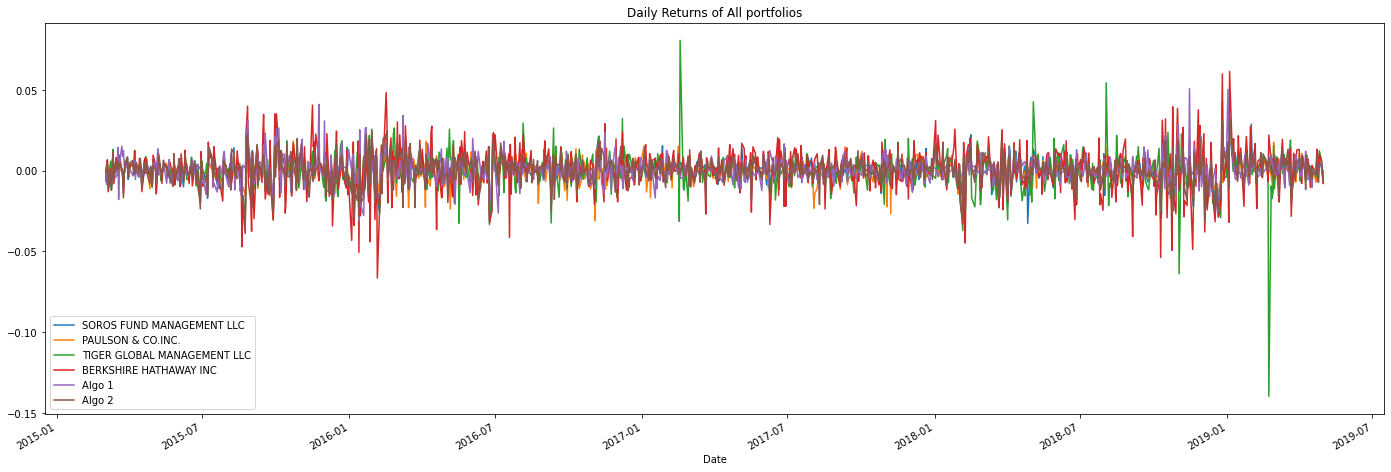

In [110]:
#funds_only_daily_returns = portfolio_returns.drop(["S&P 500"], axis=1)
daily_return = pd.concat([whale_returns,algo_returns],join="inner", axis=1)
daily_return
daily_return.plot(figsize=(24,8),title="Daily Returns of All portfolios")


#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of all Portfolios and the S&P 500'}, xlabel='Date'>

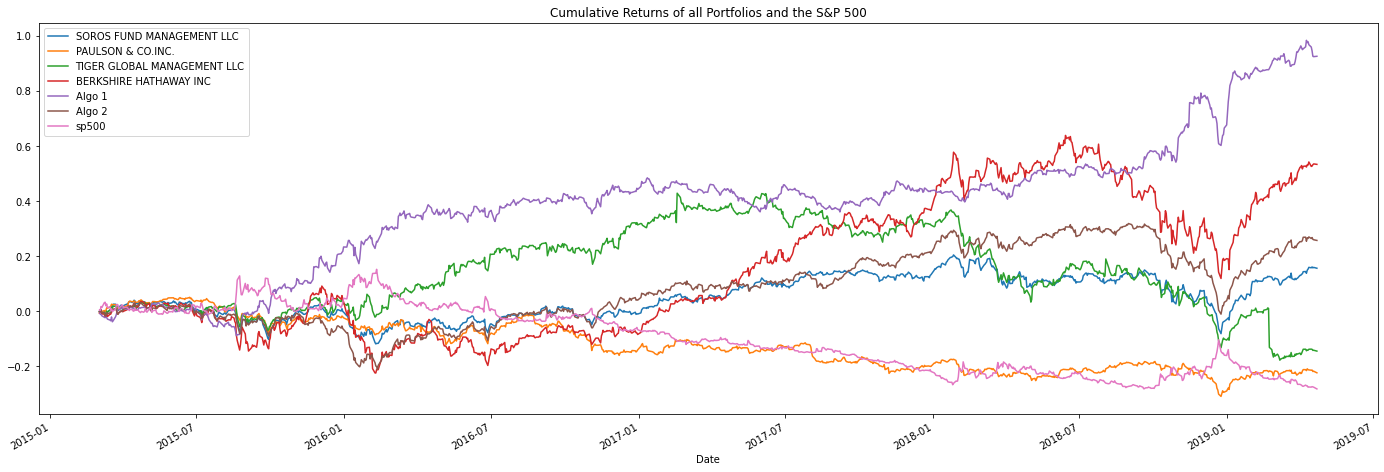

In [90]:
# Calculate cumulative returns of all portfolios
cummulative_returns = (1+portfolio_returns).cumprod() -1
cummulative_returns.head()
# Plot cumulative returns
cummulative_returns.plot(figsize = (24,8), title = "Cumulative Returns of all Portfolios and the S&P 500")

In [ ]:
# all the portfolios outperformed sp500 throughout the period 

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':' Returns of All portfolios and S&P500'}>

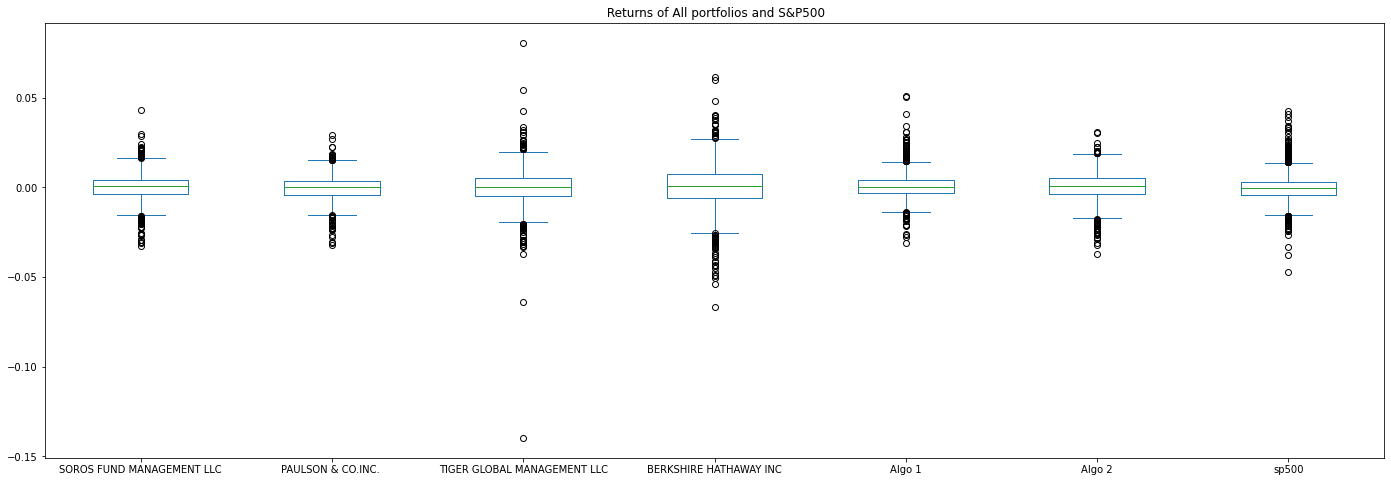

In [93]:
# Box plot to visually show risk
portfolio_returns.plot.box(figsize=(24,8), title=" Returns of All portfolios and S&P500")

<AxesSubplot:title={'center':' Returns of All portfolios'}>

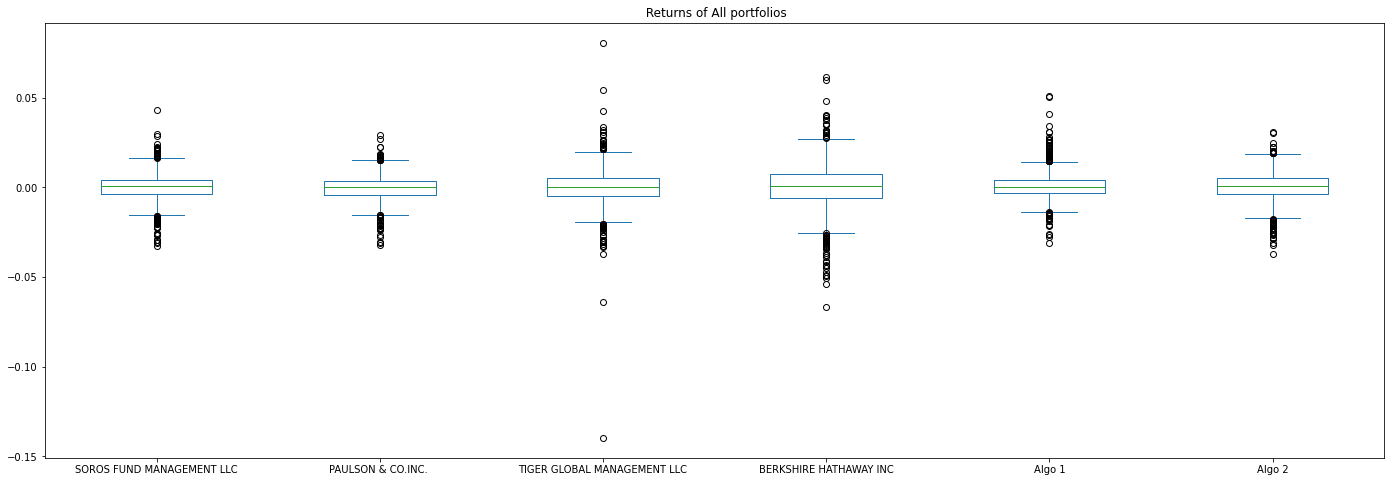

In [111]:
daily_return.plot.box(figsize=(24,8), title=" Returns of All portfolios")

In [ ]:
# by eye balling the Berkshire hathway more volitile throught the period 

### Calculate Standard Deviations

In [120]:
# Calculate the daily standard deviations of all portfolios
standard_deviations = daily_return.std()
standard_deviations

SOROS FUND MANAGEMENT LLC      0.007879
PAULSON & CO.INC.              0.007010
TIGER GLOBAL MANAGEMENT LLC    0.010876
BERKSHIRE HATHAWAY INC         0.012892
Algo 1                         0.007601
Algo 2                         0.008327
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [122]:
# Calculate  the daily standard deviation of S&P 500
standard_deviation_of_Sp500 = sp500_historical.std()
standard_deviation_of_Sp500 
# Determine which portfolios are riskier than the S&P 500
#the portfolio TIGER GLOBAL MANAGEMENT,BERKSHIRE HATHAWAY are reskier than sp500

0.008134642617809523

### Calculate the Annualized Standard Deviation

In [123]:
# Calculate the annualized standard deviation (252 trading days)
annualized_standard_deviation = portfolio_returns.std() * (252) ** (1/2) 
annualized_standard_deviation



SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
sp500                          0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Window std of all fortfolios and sp500'}, xlabel='Date'>

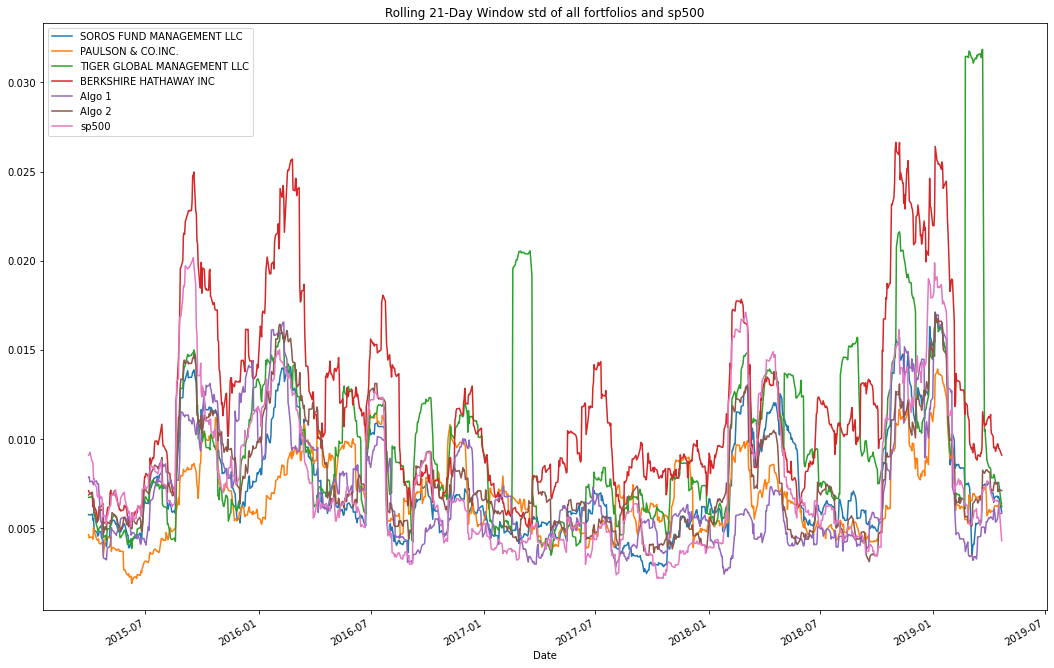

In [128]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_standard_deviation = portfolio_returns.rolling(21).std().dropna()

# Plot the rolling standard deviation
rolling_standard_deviation.plot(figsize=(18,12),title="Rolling 21-Day Window std of all fortfolios and sp500")

### Calculate and plot the correlation

<AxesSubplot:>

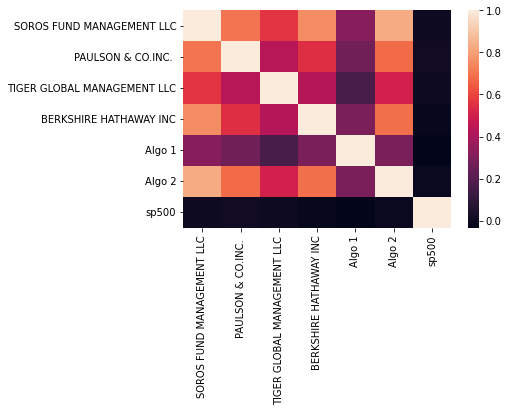

In [136]:
import seaborn as sns
# Calculate the correlation
correlation = portfolio_returns.corr()

sns.heatmap(correlation)


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Beta for a chosen portfolio and the S&P 500'}, xlabel='Date'>

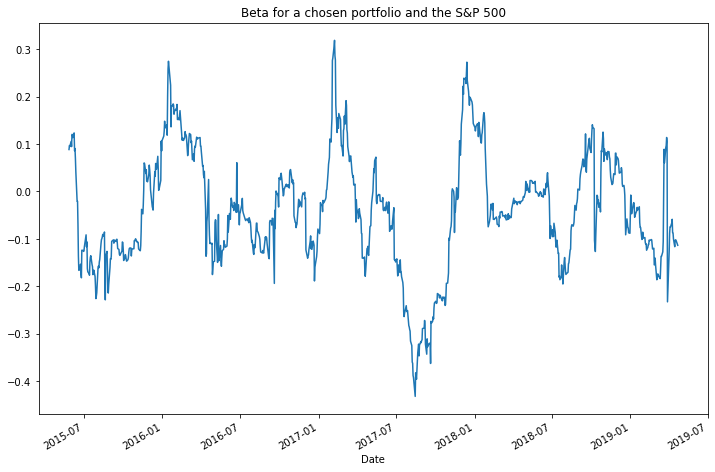

In [143]:
# Calculate covariance of a single portfolio
rolling_Algo_co= portfolio_returns["Algo 1"].rolling(60).cov(portfolio_returns["sp500"]).dropna()

# Calculate variance of S&P 500
rolling_Var= portfolio_returns["sp500"].rolling(60).var().dropna()
# Computing beta
beta = rolling_Algo_co/rolling_Var
# Plot beta trend
beta.plot(figsize=(12,8),title="Beta for a chosen portfolio and the S&P 500")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Beta for ewm with smooth'}, xlabel='Date'>

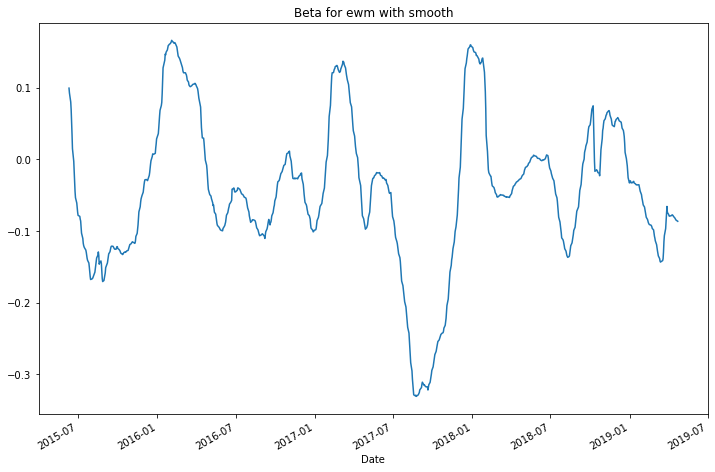

In [147]:
# Use `ewm` to calculate the rolling window
rolling_Var.ewm(span=21,min_periods=12).mean().dropna()
rolling_Algo_co.ewm(span=21,min_periods=12).mean().dropna()
beta = rolling_Algo_co.ewm(span=21,min_periods=12).mean().dropna()/rolling_Var.ewm(span=21,min_periods=12).mean().dropna()
beta.plot(figsize=(12,8),title="Beta for ewm with smooth")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [158]:
annual_mean = portfolio_returns.mean()*(252)**(1/2)

In [159]:
annual_std = portfolio_returns.std()*(252)**(1/2)

In [160]:
# Annualized Sharpe Ratios

rf = 0
Annual_Sharpe_Ratios =annual_mean/annual_std
Annual_Sharpe_Ratios





SOROS FUND MANAGEMENT LLC      0.021600
PAULSON & CO.INC.             -0.030957
TIGER GLOBAL MANAGEMENT LLC   -0.008201
BERKSHIRE HATHAWAY INC         0.038221
Algo 1                         0.086276
Algo 2                         0.030510
sp500                         -0.032668
dtype: float64

<AxesSubplot:title={'center':'visualize the Sharpe ratios'}>

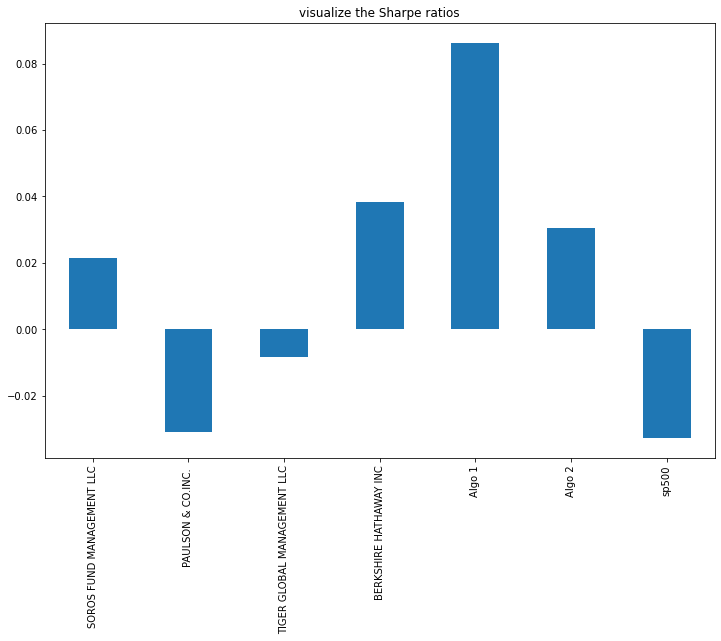

In [161]:
# Visualize the sharpe ratios as a bar plot
Annual_Sharpe_Ratios.plot.bar(figsize=(12,8),title="visualize the Sharpe ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

# 1. Comment
1. Algo 1 potfolio offers the best risk return with ~0.086 
2. Paulson & Co offers the worst risk return with sharp ration

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [165]:
# Reading data from 1st stock
aapl_historical =pd.read_csv(Path+"aapl_historical.csv",
                    parse_dates=True, infer_datetime_format=True)

df_a = aapl_historical.set_index("Trade DATE").drop(["Symbol"],axis=1).rename(columns={"NOCP":"df_a_r"})
df_a_r =df_a.pct_change().dropna().rename(columns={"NOCP":"df_a_r"})



In [164]:
# Reading data from 2nd stock
goog_historical =pd.read_csv(Path+"goog_historical.csv",
                    parse_dates=True, infer_datetime_format=True)
df_g = goog_historical.set_index("Trade DATE").drop(["Symbol"],axis=1)
df_g_r = df_g.pct_change().dropna().rename(columns={"NOCP":"df_a_g"})

In [167]:
# Reading data from 3rd stock
cost_historical =pd.read_csv(Path+"cost_historical.csv",
                    parse_dates=True, infer_datetime_format=True)


df_c = cost_historical.set_index("Trade DATE").drop(["Symbol"],axis=1)
df_c_r = df_c.pct_change().dropna().rename(columns={"NOCP":"df_a_c"})

In [176]:
# Combine all stocks in a single DataFrame

portfolio_returns = pd.concat([df_a_r,df_g_r,df_c_r],axis=1)
portfolio_returns

,df_a_r,df_a_g,df_a_c
Trade DATE,,,
5/8/2019,0.010861,0.003347,-0.008749
5/7/2019,-0.000197,0.006714,-0.004806
5/6/2019,0.027704,0.013023,0.016862
5/3/2019,0.015685,-0.003355,0.001597
5/2/2019,-0.012279,-0.019226,-0.007890
...,...,...,...
5/17/2018,0.003650,0.011469,0.003217
5/16/2018,0.006364,0.002948,-0.004459
5/15/2018,-0.009246,-0.002348,-0.016255


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

<AxesSubplot:title={'center':'weighted returns of stocks'}, xlabel='Trade DATE'>

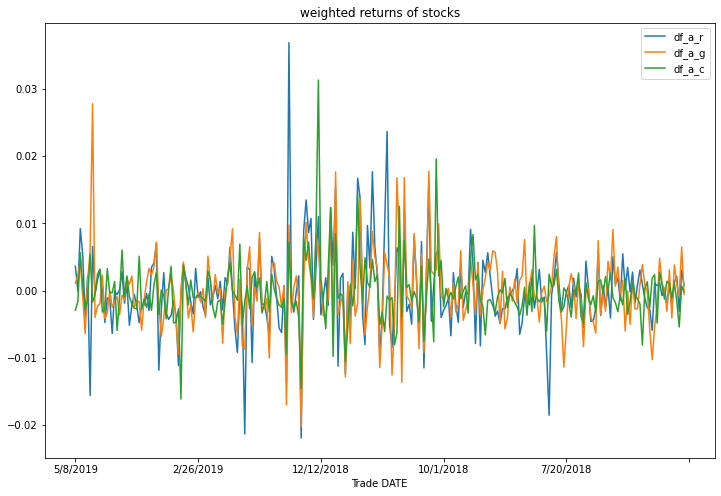

In [181]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = weights * portfolio_returns
# Display sample data
weighted_returns.plot(figsize=(12,8), title="weighted returns of stocks")

# portfolio returns

<AxesSubplot:title={'center':'portfolio weighted returns of stocks'}, xlabel='Trade DATE'>

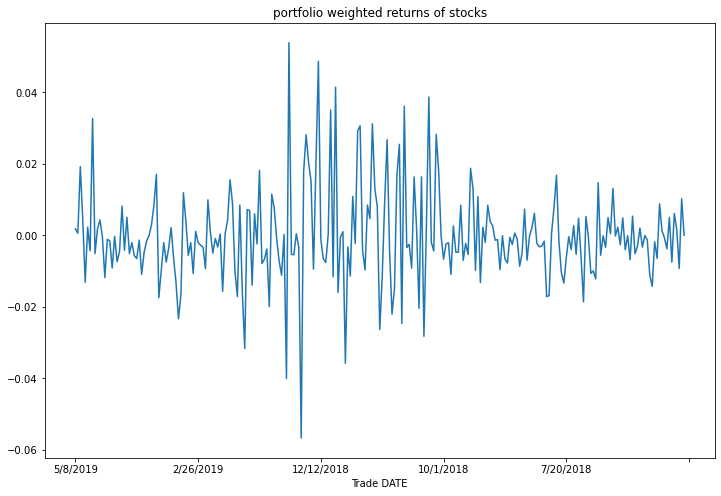

In [180]:
portfolio_weighted_returns = weighted_returns.sum(axis=1)
portfolio_weighted_returns.plot(figsize=(12,8), title="portfolio weighted returns of stocks")

In [183]:
portfolio_weighted_returns

Trade DATE
5/8/2019     0.001820
5/7/2019     0.000570
5/6/2019     0.019196
5/3/2019     0.004642
5/2/2019    -0.013131
               ...   
5/17/2018    0.006112
5/16/2018    0.001618
5/15/2018   -0.009283
5/14/2018    0.010216
5/11/2018   -0.000012
Length: 249, dtype: float64

In [192]:
portfolio_returns["portfolio_weighted_returns"] = portfolio_weighted_returns


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [191]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_returns
    


,df_a_r,df_a_g,df_a_c,portfolio_weighted_returns
Trade DATE,,,,
5/8/2019,0.010861,0.003347,-0.008749,0.001820
5/7/2019,-0.000197,0.006714,-0.004806,0.000570
5/6/2019,0.027704,0.013023,0.016862,0.019196
5/3/2019,0.015685,-0.003355,0.001597,0.004642
5/2/2019,-0.012279,-0.019226,-0.007890,-0.013131
...,...,...,...,...
5/17/2018,0.003650,0.011469,0.003217,0.006112
5/16/2018,0.006364,0.002948,-0.004459,0.001618
5/15/2018,-0.009246,-0.002348,-0.016255,-0.009283


In [197]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns.isnull().sum()

df_a_r                        0
df_a_g                        0
df_a_c                        0
portfolio_weighted_returns    0
dtype: int64

In [198]:
portfolio_returns.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

df_a_r                        0.300387
df_a_g                        0.265322
df_a_c                        0.213344
portfolio_weighted_returns    0.212131
dtype: float64

### Calculate the Annualized Standard Deviation

In [200]:
# Calculate the annualized `std`
portfolio_returns.std()*(252)**(1/2)

df_a_r                        0.300387
df_a_g                        0.265322
df_a_c                        0.213344
portfolio_weighted_returns    0.212131
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'rolling standard deviation'}, xlabel='Trade DATE'>

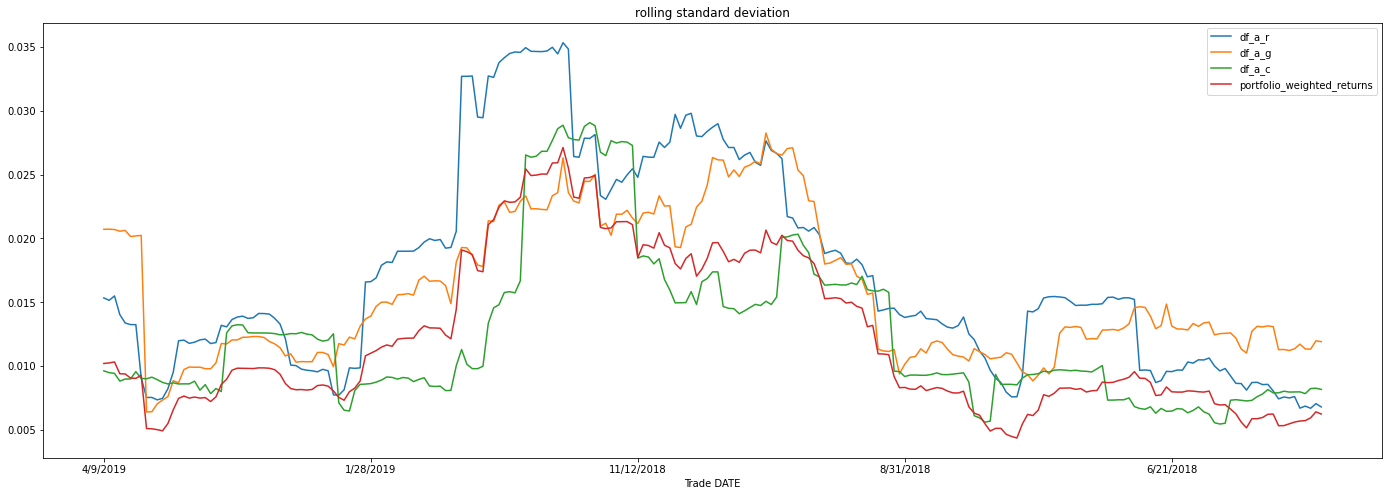

In [202]:
# Calculate rolling standard deviation
portfolio_returns.rolling(21).std().dropna()
# Plot rolling standard deviation
portfolio_returns.rolling(21).std().dropna().plot(figsize=(24,8),title="rolling standard deviation")

### Calculate and plot the correlation

In [203]:
# Calculate and plot the correlation
portfolio_returns.corr()

,df_a_r,df_a_g,df_a_c,portfolio_weighted_returns
df_a_r,1.000000,0.648156,0.413964,0.881018
df_a_g,0.648156,1.000000,0.375228,0.848645
df_a_c,0.413964,0.375228,1.000000,0.687074
portfolio_weighted_returns,0.881018,0.848645,0.687074,1.000000


<AxesSubplot:>

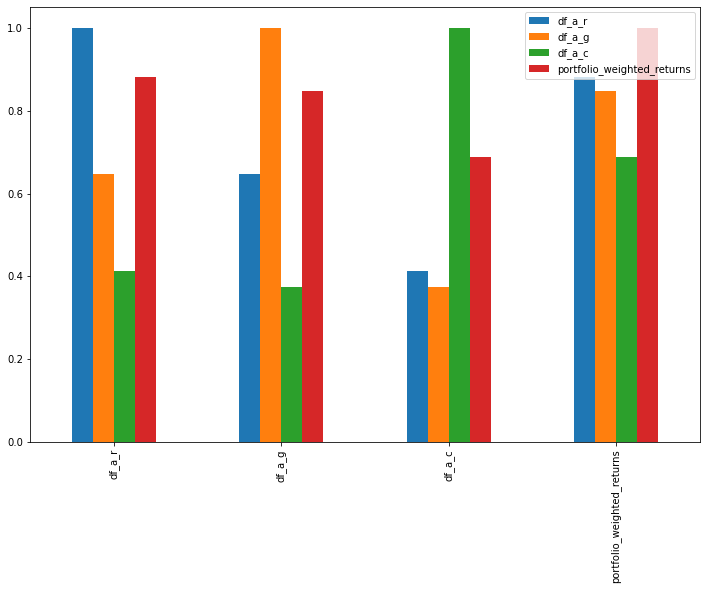

In [206]:
portfolio_returns.corr().plot(kind = "bar", figsize=(12,8))

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [214]:
portfolio_returns.rolling(60).cov().mean().dropna()

df_a_r                        0.000265
df_a_g                        0.000216
df_a_c                        0.000150
portfolio_weighted_returns    0.000210
dtype: float64

In [215]:
portfolio_returns.rolling(60).var().mean().dropna()

df_a_r                        0.000418
df_a_g                        0.000297
df_a_c                        0.000213
portfolio_weighted_returns    0.000210
dtype: float64

In [216]:
# Calculate and plot Beta
beta = portfolio_returns.rolling(60).cov().mean().dropna()/portfolio_returns.rolling(60).var().mean().dropna()

In [217]:
beta.tail()

df_a_r                        0.633558
df_a_g                        0.728321
df_a_c                        0.706114
portfolio_weighted_returns    1.000000
dtype: float64

<AxesSubplot:>

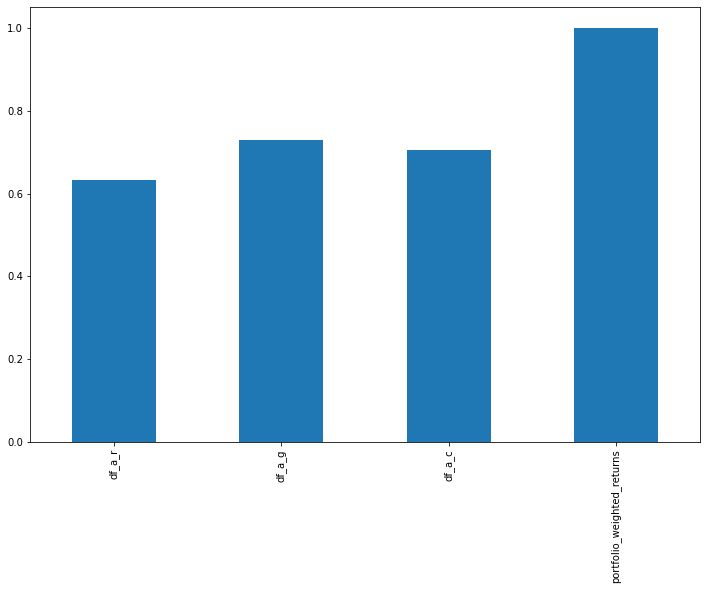

In [229]:
beta.plot.bar(figsize=(12,8))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [223]:
 annual_mean = portfolio_returns.mean()*(252)**(1/2)

In [224]:
annual_std =  portfolio_returns.std()*(252)**(1/2)

In [225]:
# Calculate Annualized Sharpe Ratios
sharp_rahios =   annual_mean /annual_std
sharp_rahios

df_a_r                       -0.003890
df_a_g                       -0.005354
df_a_c                       -0.058547
portfolio_weighted_returns   -0.023695
dtype: float64

<AxesSubplot:>

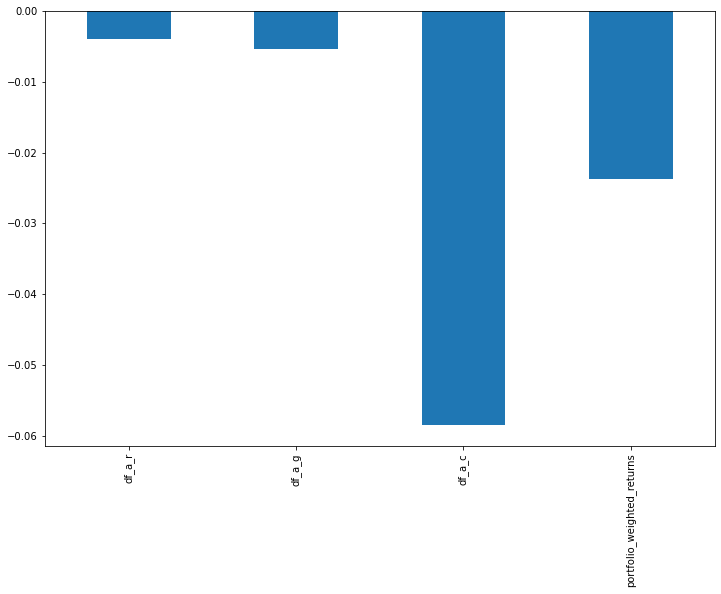

In [228]:
# Visualize the sharpe ratios as a bar plot
sharp_rahios.plot.bar(figsize=(12,8))

### How does your portfolio do?

Write your answer here!